In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import itertools
import random

In [11]:
# Construct dictionary 'uniques[col][val]':
# -- keys:
#       * col - column in dataframe containing single feature
#       * val - value in column
# -- value: number of times value val appears in column col

# For the first year of data:
directories = [ "/home/aleksey/Downloads/CSV_DATA/Jul_Dec_2019/", "/home/aleksey/Downloads/CSV_DATA/Jan_Jun_2020/"]
flag = False

for directory in directories:
    for filename in sorted(os.listdir(directory)):
        if "sends" in filename and "wk" in filename:
            print (filename)
            df = pd.read_csv(directory+filename)
            if flag == False:
                cols = list(df.columns.values)
                uniques = {}
                for col in cols:
                    uniques[col] = {}
                flag = True
                    
            for col in cols:
                if col == 'riid': # ignore column 'riid'
                    continue
#                print (col)
                unique_vals = list(df[col].unique())
                for val in unique_vals:
                    df_sel = df.loc[ df[col] == val ]
                    if val not in uniques[col].keys():
                        uniques[col][val] = df_sel.shape[0]
                    else:
                        uniques[col][val] += df_sel.shape[0]

sends_2019_wk26.csv
sends_2019_wk27.csv
sends_2019_wk28.csv
sends_2019_wk29.csv
sends_2019_wk30.csv
sends_2019_wk31.csv
sends_2019_wk32.csv
sends_2019_wk33.csv
sends_2019_wk34.csv
sends_2019_wk35.csv
sends_2019_wk36.csv
sends_2019_wk37.csv
sends_2019_wk38.csv
sends_2019_wk39.csv
sends_2019_wk40.csv
sends_2019_wk41.csv
sends_2019_wk42.csv
sends_2019_wk43.csv
sends_2019_wk44.csv
sends_2019_wk45.csv
sends_2019_wk46.csv
sends_2019_wk47.csv
sends_2019_wk48.csv
sends_2019_wk49.csv
sends_2019_wk50.csv
sends_2019_wk51.csv
sends_2019_wk52.csv
sends_2020_wk00.csv
sends_2020_wk01.csv
sends_2020_wk02.csv
sends_2020_wk03.csv
sends_2020_wk04.csv
sends_2020_wk05.csv
sends_2020_wk06.csv
sends_2020_wk07.csv
sends_2020_wk08.csv
sends_2020_wk09.csv
sends_2020_wk10.csv
sends_2020_wk11.csv
sends_2020_wk12.csv
sends_2020_wk13.csv
sends_2020_wk14.csv
sends_2020_wk15.csv
sends_2020_wk16.csv
sends_2020_wk17.csv
sends_2020_wk18.csv
sends_2020_wk19.csv
sends_2020_wk20.csv
sends_2020_wk21.csv
sends_2020_wk22.csv


campaign_category 10
Brand 9.040940080836718
Core 17.3366014339
Dedicated 36.69047069402711
InnovationSpotlight 2.9699018709145726
NewArrivals 4.063989234117968
Other 4.583449120933157
ProductSpotlight 3.5810615600308675
Replen 0.7902374088210821
Tops 3.567960979585961
Trend 17.375387616832565

campaign_Brand 2
0 90.95905991916328
1 9.040940080836718

campaign_Core 2
0 82.6633985661
1 17.3366014339

campaign_Dedicated 2
0 63.30952930597289
1 36.69047069402711

campaign_InnovationSpotlight 2
0 97.03009812908543
1 2.9699018709145726

campaign_NewArrivals 2
0 95.93601076588203
1 4.063989234117968

campaign_ProductSpotlight 2
0 96.41893843996914
1 3.5810615600308675

campaign_Replen 2
0 99.20976259117892
1 0.7902374088210821

campaign_Tops 2
0 96.43203902041404
1 3.567960979585961

campaign_Trend 2
0 82.62461238316743
1 17.375387616832565

campaign_Other 2
0 95.41655087906685
1 4.583449120933157

discount 5
0 70.87503355745496
30 6.919633137162651
40 7.39694079858491
50 13.216458942079273


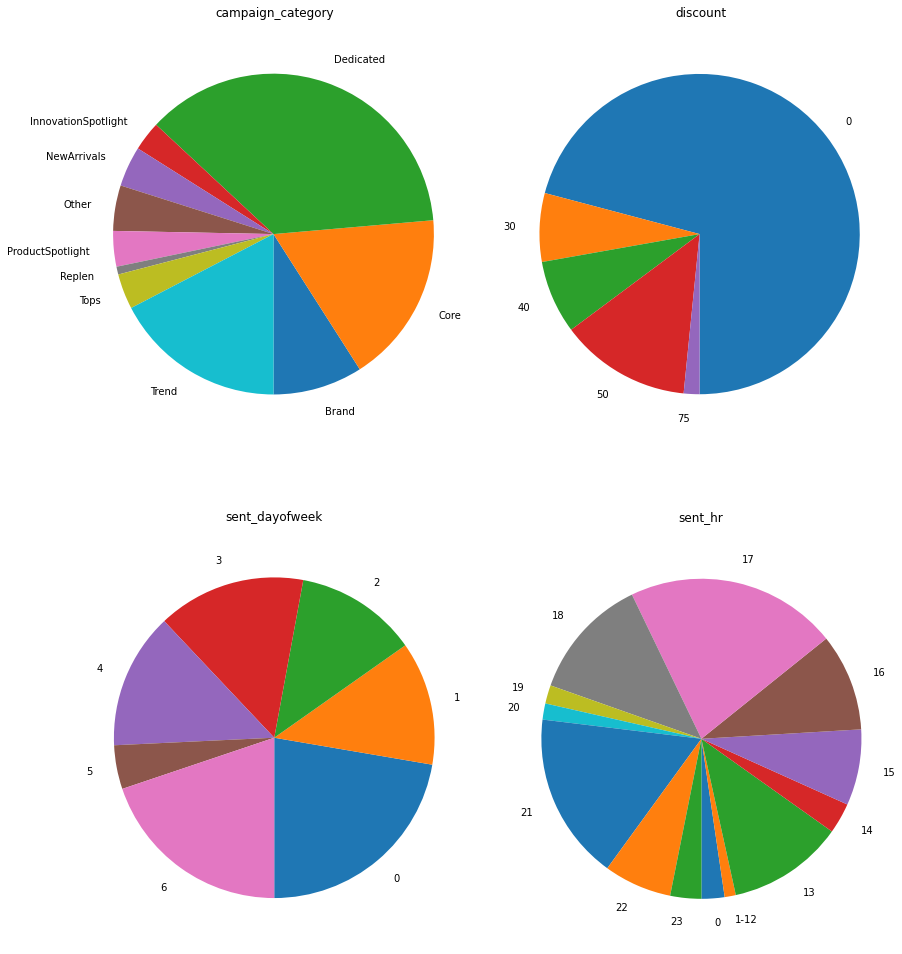

In [23]:
# Analyze the distributions of binary categorical features and categorical features with 
if 'riid' in uniques.keys(): # ignore column 'riid'
    uniques.pop('riid')

exclude_cols = ['aq_year', 'aq_week', 'aq_dayofweek', 'aq_period', 'promo', 'sale']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 17)

num = 0
for col in uniques.keys():
    if col in exclude_cols:
        continue
    if 3 < len(uniques[col].keys()) < 25:
        exclude_cols.append(col)
        print (col, len(uniques[col].keys()))
        labels = sorted(uniques[col].keys())
        if col == 'aq_year':
            labels2 = []
            for val in labels:
                labels2.append("\'"+str(val)[-2:])
            labels = labels2
        if col == 'sent_hr':
            labels2 = ['0', '1-12']
            for label in labels[13:]:
                labels2.append(str(label))
            labels = labels2
        sizes = []
        for i, val in enumerate(sorted(uniques[col].keys())):
            print (val, 100*uniques[col][val]/sum(uniques[col].values()))
            if col != 'sent_hr':
                sizes.append(100*uniques[col][val]/sum(uniques[col].values()))
            else:
                if i==0 or i==1 or i > 12:
                    sizes.append(100*uniques[col][val]/sum(uniques[col].values()))
                else:
                    sizes[-1] += 100*uniques[col][val]/sum(uniques[col].values())

        axs[num // 2][num % 2].title.set_text(col)
        axs[num // 2][num % 2].axis('off')
        axs[num // 2][num % 2].pie(sizes, labels=labels, startangle=270, labeldistance=1.15)
        axs[num // 2][num % 2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        num += 1
        print()
    elif len(uniques[col].keys()) <= 3:
        exclude_cols.append(col)
        print (col, len(uniques[col].keys()))
        labels = sorted(uniques[col].keys())
        for i, val in enumerate(sorted(uniques[col].keys())):
            print (val, 100*uniques[col][val]/sum(uniques[col].values()))
        print()
        
fig.savefig("/home/aleksey/Desktop/pie_yr1.pdf")

sent_week
retention_score
frequency_score


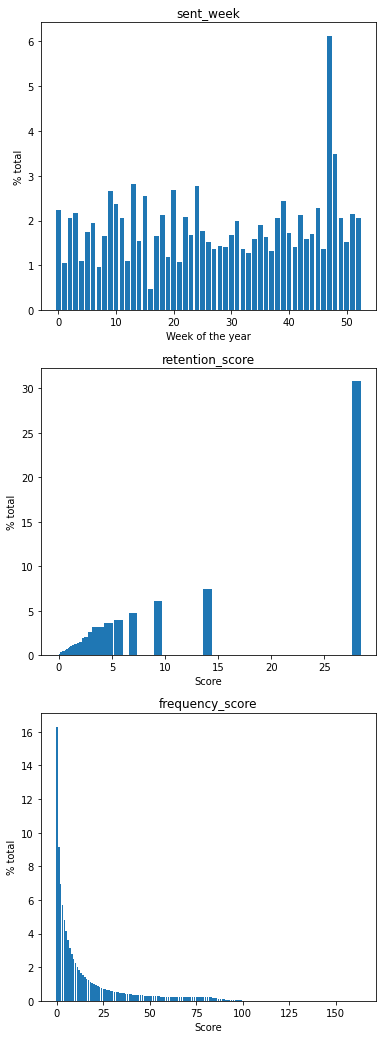

In [14]:
fig, axs = plt.subplots(3)
fig.set_size_inches(6, 18)

weeks = ['sent_week']
scores = ['retention_score', 'frequency_score']
num = 0
for col in weeks+scores:
    print (col)
#    if col not in exclude_cols:
#        exclude_cols.append(col)

    height = []
    for val in sorted(uniques[col].keys()):        
        height.append(100*uniques[col][val]/sum(uniques[col].values()))
#        if col != 'retention_score':
#            print ("{:12d}{:12.6f}".format(val, 100*uniques[col][val]/sum(uniques[col].values())))
#        else:
#            print ("{:12.6f}{:12.6f}".format(val, 100*uniques[col][val]/sum(uniques[col].values())))
#    print ()
    axs[num].title.set_text(col)
    if col in weeks:
        axs[num].set_xlabel('Week of the year')
    else:
        axs[num].set_xlabel('Score')        
    axs[num].set_ylabel('% total')
    axs[num].bar(x=sorted(uniques[col].keys()), height=height)
    num += 1

fig.savefig("/home/aleksey/Desktop/weeks_scores_yr1.pdf")

sent_week
retention_score
frequency_score
rev_3dv2
The revenue is 0 for 99.9190% of customers


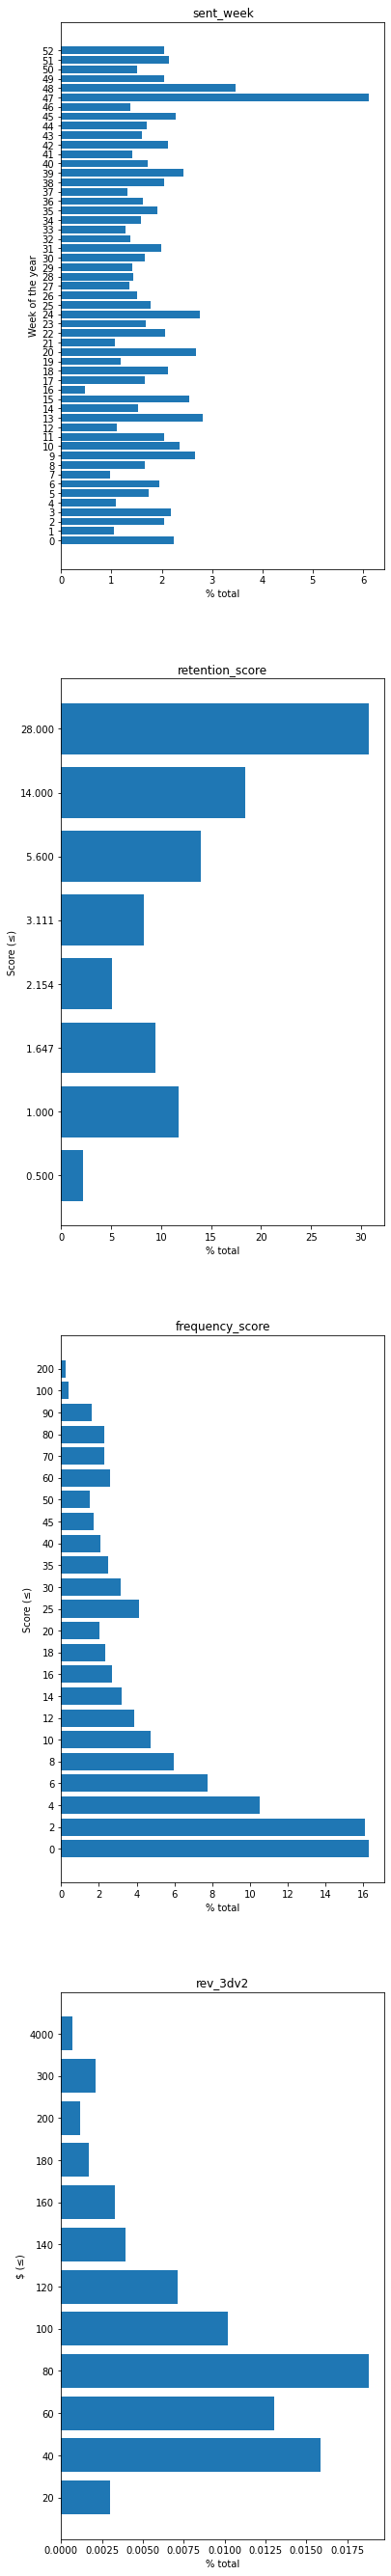

In [15]:
fig, axs = plt.subplots(4)
fig.set_size_inches(6, 48)

weeks = ['sent_week']
scores = ['retention_score', 'frequency_score']
rev = ['rev_3dv2']
num = 0
for col in weeks+scores+rev:
    print (col)
    if col not in exclude_cols:
        exclude_cols.append(col)
    if col in weeks:
        bins = [-1] + [i for i in range(53)]
    elif col == 'retention_score':
#        bins = [0] + [0.3 + 0.1*i for i in range(11)] + sorted(uniques[col].keys())[-19:]
        rest = list(sorted(uniques[col].keys())[-19:])
        bins = [0] + [0.5 + 0.5*i for i in range(2)] + rest[2::4]
        bins = bins[:-1] + rest[-2:]
    elif col == 'frequency_score':
#        bins = [-1] + [i for i in range(21)] + [22 + i*2 for i in range(10)] + [44 + i*4 for i in range(10)] + [85, 90, 100, 200]        
        bins = [-1] + [2*i for i in range(11)] + [25 + i*5 for i in range(6)] + [60 + i*10 for i in range(5)] + [200]
    elif col == 'rev_3dv2':
#        bins = [-20, 0, 74, 400, 4000] + [15 + i*5 for i in range(28)] + [160 + i*10 for i in range(5)] + [250 + i*50 for i in range(3)]
        bins = [-20, 0, 300, 4000] + [20 + i*20 for i in range(10)]
        bins = sorted(bins)

    bindict = {}
    for i in range(len(bins)):
        bindict[bins[i]] = 0
    n_bins = len(bins)
    total = 0
    for el in sorted(uniques[col].keys()):
#        print ("{:10.2f}{:15d}".format(el, uniques[col][el]))
        total += uniques[col][el]
        bn = n_bins-1
#        print (bn, bins[bn])
        while el <= bins[bn]:
            bn -= 1
#        print ("*", el, "<=", bins[bn+1])
        bindict[bins[bn+1]] += uniques[col][el]
    bindict.pop(bins[0])
#    print (bindict)

    if col == 'rev_3dv2':
        print ("The revenue is 0 for {:7.4f}% of customers".format(100.*bindict[0.0]/total))
        bindict.pop(0.0)
    if col == 'retention_score':
        labels = []
        for el in sorted(bindict.keys()):
            labels.append("{:6.3f}".format(el))
    else:
        labels = sorted(bindict.keys())
    height = []
    for el in sorted(bindict.keys()):
        height.append(100.*bindict[el]/total)
    axs[num].title.set_text(col)
    if col in scores:
        axs[num].set_ylabel('Score (\u2264)')
    elif col in weeks:
        axs[num].set_ylabel('Week of the year')
    elif col in rev:
        axs[num].set_ylabel('$ (\u2264)')
    axs[num].set_xlabel('% total')
#    axs[num].barh(y=[i in range(len(bindict.keys()))], width=height, tick_label=sorted(bindict.keys()))
    axs[num].barh(y=[i for i in range(len(bindict.keys()))], width=height, tick_label = labels)

    num += 1

fig.savefig("/home/aleksey/Desktop/weeks_scores_rev_yr1_binned.pdf")

    100000  2.98185771
    110000  5.78924933
    120000  5.12947660
    130000  6.77269757
    140000  8.35993146
    150000  8.42437484
    160000 10.19359516
    170000 19.34025170
    180000 13.53902239
    190000  3.74808402
    200000  5.36879938
    210000  3.60116408
    400000  6.75149577


<BarContainer object of 13 artists>

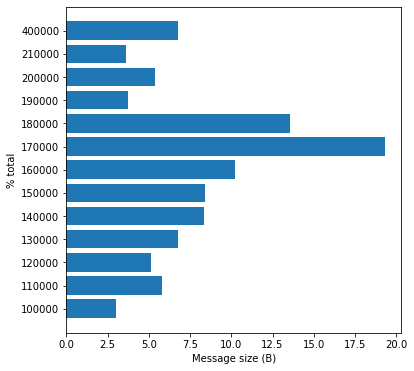

In [16]:
fig, axs = plt.subplots(1)
fig.set_size_inches(6, 6)

col = 'message_size'
lengths = sorted(uniques[col].keys())
n_len = len(lengths)
#print (n_len, max(lengths), min(lengths))
bins = [80000] + [100000 + 10000*i for i in range(12)] + [400000]
#print (bins)

bindict = {}
for i in range(len(bins)):
    bindict[bins[i]] = 0
n_bins = len(bins)
total = 0

for ind, el in enumerate(lengths):
#    if ind % 1000 == 0:
#        print (ind)
    total += uniques[col][el]
    bn = n_bins-1
    while el <= bins[bn]:
        bn -= 1
    bindict[bins[bn+1]] += uniques[col][el]

bindict.pop(bins[0])

labels = sorted(bindict.keys())
x = [i for i in range(len(labels))]
y = []
for el in labels:
    print("{:10d}{:12.8f}".format(el, 100.*bindict[el]/total))
    y.append(100.*bindict[el]/total)
axs.set_xlabel('Message size (B)')
axs.set_ylabel('% total')
axs.barh(y=x, width=y, tick_label=labels)

In [17]:
grid = {}
grid['opened'] = [0, 1]
grid['unsub'] = [0, 1]
bins = [-20, 0, 300, 4000] + [20 + i*20 for i in range(10)]
grid['rev_3dv2'] = sorted(bins)
grid['retention_score'] = [0, 0.5, 1.0, 1.6470588235294117, 2.1538461538461537, 3.111111111111111, 5.6, 14.0, 28.0]
grid['frequency_score'] = [-1] + [2*i for i in range(11)] + [25 + i*5 for i in range(6)] + [60 + i*10 for i in range(5)] + [200]
grid['campaign_category'] = ['Brand', 'Core', 'Dedicated', 'InnovationSpotlight', 'NewArrivals', 'Other', 'ProductSpotlight', 'Replen', 'Tops', 'Trend']
grid['discount'] = [0, 30, 40, 50, 75]
#grid['sent_dayofweek'] = [i for i in range(7)]
#grid['sent_week'] = [i for i in range(52)]
#grid['message_size'] = [80000] + [100000 + 10000*i for i in range(12)] + [400000]

grid_cols = grid.keys()
for col in grid_cols:
    print (col, grid[col])
    
all_list = []
for col in grid_cols:
    all_list.append(grid[col])
gridpts = list(itertools.product(*all_list))

opened [0, 1]
unsub [0, 1]
rev_3dv2 [-20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300, 4000]
retention_score [0, 0.5, 1.0, 1.6470588235294117, 2.1538461538461537, 3.111111111111111, 5.6, 14.0, 28.0]
frequency_score [-1, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 200]
campaign_category ['Brand', 'Core', 'Dedicated', 'InnovationSpotlight', 'NewArrivals', 'Other', 'ProductSpotlight', 'Replen', 'Tops', 'Trend']
discount [0, 30, 40, 50, 75]


In [18]:
def campaign_cat(row):
    cats = ['Brand', 'Core', 'Dedicated', 'InnovationSpotlight', 'NewArrivals', 'Other', 'ProductSpotlight', 'Replen', 'Tops', 'Trend']
    for cat in cats:
        if row['campaign_'+cat] == 1:
            return cat
#    return 'Other'

In [20]:
percent = 1. # percent of dataset to be selected

#f = open("/home/aleksey/Downloads/Kartha/dtypes.json", 'r')
#for line in f:
#    column_dict = json.loads(line)
#f.close()
#columns = list(column_dict.keys())
#excluded_cols = ['days_subscr', 'aq_week', 'aq_dow', 'aq_period']

#excluded_cols = ['aq_year', 'aq_week', 'aq_dayofweek', 'aq_period', 'promo', 'sale']

#directories = [ "/home/aleksey/Downloads/Kartha/2019/", "/home/aleksey/Downloads/Kartha/Jan_Jun_2020/"]
directories = [ "/home/aleksey/Downloads/CSV_DATA/Jul_Dec_2019/", "/home/aleksey/Downloads/CSV_DATA/Jan_Jun_2020/"]

for directory in directories:
    for filename in sorted(os.listdir(directory)):
        if '.csv' not in filename:
            continue
        print ("Loading", filename, "...")
#        df = pd.read_csv(directory+filename, header=0, names=columns)
        df = pd.read_csv(directory+filename)

#        print ("  Processing dataframe...")
#        df.drop(columns = excluded_cols, inplace=True)
#        df['campaign_category'] = df.apply(lambda row: campaign_cat(row), axis=1)

#        for dim, col in enumerate(grid_cols):
#            print (dim, col, len(grid[col]))
#        print (df['unsub'].unique())

        print ("  Distributing rows on a grid...")
        gridrows = {}
        for pt in gridpts:
            gridrows[pt] = []

        for ind, row in df.iterrows():
            if ind % 100000 == 0:
                print (ind)
            params = {}
            for col in grid_cols:
                if col != 'retention_score' and col != 'frequency_score' and col != 'rev_3dv2':
                    params[col] = row[col]
#                    if col == 'unsub' and row[col] == 2: # Temporary fix - remove error row from dataset!!!
#                        params[col] = 1
                else:
                    bins = grid[col]
                    n_bins = len(bins)
                    bn = n_bins-1
                    while row[col] <= bins[bn]:
                        bn -= 1
                    params[col] = bins[bn+1]
            pt = [params[col] for col in grid_cols]
            pt = tuple(pt)
            gridrows[pt].append(ind)

        print ("  Selecting rows for sample...")
        selected_rows = []
        for ind, pt in enumerate(gridpts):
            if len(gridrows[pt]) > 0:
                total_num = len(gridrows[pt])
                num = round(percent*len(gridrows[pt])/100.)
#                print (ind, total_num, num)
                if num > 0:
                    for i in range(num):
                        selected_rows.append(gridrows[pt][random.randint(0,total_num-1)])
                else:
                    r = random.random()
                    if r < percent*len(gridrows[pt])/100.:
                        selected_rows.append(gridrows[pt][random.randint(0,total_num-1)])
        f = open(directory+"selected_rows_"+filename, "w")
        for srow in sorted(selected_rows):
            f.write("{:20d}\n".format(srow))
        f.close()

Loading sends_2019_wk26.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
  Selecting rows for sample...
Loading sends_2019_wk27.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
  Selecting rows for sample...
Loading sends_2019_wk28.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
  Selecting rows for sample...
Loading sends_2019_wk29.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
  Selecting rows for sample...
Loading sends_2019_wk30.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
  Selecting rows for sample...
Loading sends_2019_wk31.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1

800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
  Selecting rows for sample...
Loading sends_2020_wk16.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
  Selecting rows for sample...
Loading sends_2020_wk17.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
  Selecting rows for sample...
Loading sends_2020_wk18.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
  Selecting rows for sample...
Loading sends_2020_wk19.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
  Selecting rows for sample...
Loading sends_2020_wk20.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
  Selecting rows for sample...
Loading

In [22]:
percent = 0.3 # percent of dataset to be selected

directories = [ "/home/aleksey/Downloads/CSV_DATA/Jul_Dec_2019/", "/home/aleksey/Downloads/CSV_DATA/Jan_Jun_2020/"]

for directory in directories:
    for filename in sorted(os.listdir(directory)):
        if '.csv' not in filename or 'selected' in filename:
            continue
        print ("Loading", filename, "...")
        df = pd.read_csv(directory+filename)
        
        print ("  Distributing rows on a grid...")
        gridrows = {}
        for pt in gridpts:
            gridrows[pt] = []

        for ind, row in df.iterrows():
            if ind % 100000 == 0:
                print (ind)
            params = {}
            for col in grid_cols:
                if col != 'retention_score' and col != 'frequency_score' and col != 'rev_3dv2':
                    params[col] = row[col]
                else:
                    bins = grid[col]
                    n_bins = len(bins)
                    bn = n_bins-1
                    while row[col] <= bins[bn]:
                        bn -= 1
                    params[col] = bins[bn+1]
            pt = [params[col] for col in grid_cols]
            pt = tuple(pt)
            gridrows[pt].append(ind)

        print ("  Selecting rows for sample...")
        df_trainrows = pd.read_csv(directory+"selected_rows_"+filename, sep='\n', header=0, names=['tr'])
        selected_rows = []
        for ind, pt in enumerate(gridpts):
            if len(gridrows[pt]) > 0:
                total_num = len(gridrows[pt])
                num = round(percent*len(gridrows[pt])/100.)
                if num > 0:
                    for i in range(num):
                        row = gridrows[pt][random.randint(0,total_num-1)]
                        while row in df_trainrows.values:
                            row = gridrows[pt][random.randint(0,total_num-1)]
                        selected_rows.append(row)
                else:
                    r = random.random()
                    if r < percent*len(gridrows[pt])/100.:
                        row = gridrows[pt][random.randint(0,total_num-1)]
                        while row in df_trainrows.values:
                            row = gridrows[pt][random.randint(0,total_num-1)]
                        selected_rows.append(row)
        f = open(directory+"selected_rows_valid_"+filename, "w")
        for srow in sorted(selected_rows):
            f.write("{:20d}\n".format(srow))
        f.close()

Loading sends_2019_wk26.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
  Selecting rows for sample...
Loading sends_2019_wk27.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
  Selecting rows for sample...
Loading sends_2019_wk28.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
  Selecting rows for sample...
Loading sends_2019_wk29.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
  Selecting rows for sample...
Loading sends_2019_wk30.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
  Selecting rows for sample...
Loading sends_2019_wk31.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1

800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
  Selecting rows for sample...
Loading sends_2020_wk16.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
  Selecting rows for sample...
Loading sends_2020_wk17.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
  Selecting rows for sample...
Loading sends_2020_wk18.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
  Selecting rows for sample...
Loading sends_2020_wk19.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
  Selecting rows for sample...
Loading sends_2020_wk20.csv ...
  Distributing rows on a grid...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
  Selecting rows for sample...
Loading